<a href="https://colab.research.google.com/github/ImolaFodor/numerical-analysis-2022-2023/blob/main/final_project_2022_2023_ifodor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final project, Numerical Analysis 2022-2023


## Project description

In this project, we would like to compare the performance of some embarassingly simple algorithms to solve a classification problem based on the MNIST database. 

The abstract aim of the program is to write a function:

```
result = classify(image)
```

that takes as input a small grey scale image of a hand-written digit (from the MNIST database), and returns the digit corresponding to the content of the image.

An example of the images we'll be working on is the following:

![mnist examples](https://m-alcu.github.io/assets/mnist.png)

Some background on the MNIST database (from wikipedia):


## MNIST database

*From Wikipedia, the free encyclopedia*

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning. It was created by "re-mixing" the samples from NIST's original datasets. The creators felt that since NIST's training dataset was taken from American Census Bureau employees, while the testing dataset was taken from American high school students, it was not well-suited for machine learning experiments. Furthermore, the black and white images from NIST were normalized to fit into a 28x28 pixel bounding box and anti-aliased, which introduced grayscale levels.

## MNIST sample images.

The MNIST database contains 60,000 training images and 10,000 testing images. Half of the training set and half of the test set were taken from NIST's training dataset, while the other half of the training set and the other half of the test set were taken from NIST's testing dataset. There have been a number of scientific papers on attempts to achieve the lowest error rate; one paper, using a hierarchical system of convolutional neural networks, manages to get an error rate on the MNIST database of 0.23%. The original creators of the database keep a list of some of the methods tested on it. In their original paper, they use a support vector machine to get an error rate of 0.8%. An extended dataset similar to MNIST called EMNIST has been published in 2017, which contains 240,000 training images, and 40,000 testing images of handwritten digits and characters.

## Algorithm

We start by defining the distance between two images. Ideally, a distance function between two images is zero when the images are the same, and greater than zero when the images are different. 

The bigger the distance, the more different the images should be. Ideally, the distance between an image of the number `9` should be closer to an image of the number `8` than to an image of the number `1` (the digits `9` and `8`, as images, differ by the fact that the first has one closed loop, while the second has two closed loops, while the digit `1` is mostly a straight line). Two different images representing the same number should be even closer (i.e., the distance function should return a "small" number).

Given a distance and a training set of images for which we know everything, the simplest algorithm we can think of to classify an image `z`, is the following: given a set of train images (`x_train`) for which we know the digit they represent (`y_train`), measure the distance between `z` and all images in `x_train`, and classify the image `z` to represent the same digit of the image that is closest to `z` in `x_train`:

Parameters of the algorithm:

- `x_train`
- `y_train`
- a distance function `dist`  

Input of the function

- `z`

Output of the function

- `digit`

where 

```
def classify(z):
    all_distances = array([dist(x, z) for x in x_train])
    digit = y_train[argmin(all_distances)]
    return digit
```

We will experiment with different distances, and we will try to improve the algorithm above in a step by step fashion.

## Data description

Each image in the MNIST dataset represents a hand written digit, in the form of a matrix of `28x28` values between zero and one, representing gray scale values (zero = white, one = black).

We use an array of `60.000x28x28` floating point values to collect all training images, and an array of `60.000` digits containing the (correct) value of the training digits (between 0 and 9 inclusive).

The testing images are instead collected into two arrays of size `10.000x28x28` and `10.0000` respectively.

In [2]:
%pylab inline

# # input image dimensions
img_rows, img_cols = 28, 28

import keras.backend as K
from keras.datasets import mnist

# # the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols)
    input_shape = (img_rows, img_cols)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

Populating the interactive namespace from numpy and matplotlib
11490434/11490434 [==============================] - 1s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


# Plotting one image

How do we plot the images? `pyplot`, which has been imported by the first line of the previous cell, contains a command called `imshow`, that can be used to plot images. 

In this case we know it is a greyscale image, with zero representing white and one representing black, so we use a colormap that goes from white to black, i.e., `gray_r` where `_r` stands for reversed. 

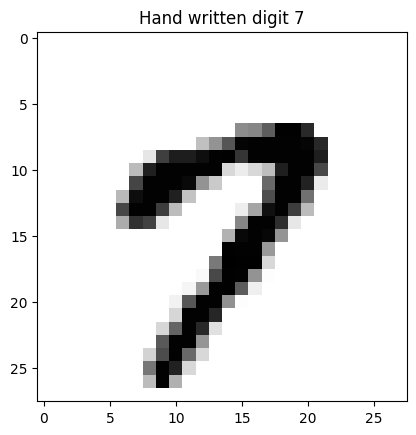

In [3]:
# Show image number 15, and write in the title what digit it should correspond to
N=15
imshow(x_train[N], cmap='gray_r')
_ = title('Hand written digit '+str(y_train[N]))

**IF YOU DON'T HAVE ENOUGH COMPUTATIONAL POWER, RUN THE EXERCISES ONLY UP TO WHAT IS SUSTAINABLE FOR YOUR PC**

General guidelines:

- Time all functions you construct, and try to make them run as fast as possible by precomputing anything that can be precomputed
- Extra points are gained if you reduce the complexity of the given algorithms in any possible way, for example by exploiting linearity, etc.
- If something takes too long to execute, make sure you time it on a smaller set of input data, and give estimates of how long it would take to run the full thing (without actually running it). Plot only the results you manage to run on your PC.

# Assignment 1

Implement the following distance functions

- d_infty $$ d_{\infty}(a,b) := \max_{i,j} |b_{ij}-a_{ij}|$$
- d_one $$ d_1(a,b) := \sum_{i,j} |b_{ij}-a_{ij}|$$
- d_two $$ d_2(a,b) := \sqrt{\sum_{i,j} |b_{ij}-a_{ij}|^2}$$

that take two `(28,28)` images in input, and return a non-negative number.



In [4]:
def d_infty(a,b):\
  return abs(b-a).max()

def d_one(a,b):\
  return abs(b-a).sum()

def d_two(a,b):
  return sqrt(power(abs(b-a),2).sum())

In [5]:
res = d_infty(x_train[1], x_train[2])
print('inf-norm norm between images x_train[1] and x_train[2]: ' + str(res))

res = d_one(x_train[1], x_train[2])
print('1-norm between images x_train[1] and x_train[2]: ' + str(res))

res = d_two(x_train[1], x_train[2])
print('2-norm between images x_train[1] and x_train[2]: ' + str(res))

inf-norm norm between images x_train[1] and x_train[2]: 1.0
1-norm between images x_train[1] and x_train[2]: 160.91765
2-norm between images x_train[1] and x_train[2]: 11.368364


# Assignment 2

Write a function that, given a number `N`, and a distance function `dist`, computes the distance matrix D of shape `(N,N)` between the first `N` entries of `x_train`:

```
D[i,j] = dist(x_train[i], x_train[j])
```

performing the **minimum** number of operations (i.e., avoid computing a distance if it has already been computed before, i.e., keep in mind that dist(a,b) = dist(b,a)).



In [6]:
def dist_imgs(N,dist):

  s = (N,N)
  D = zeros(s)

  # calculate only distances on the lower triangle of the matrix
  for i in range(N)[1:]:
    for j in range(i):
      D[i,j] = dist(x_train[i], x_train[j])
      D[j,i] = D[i,j]

  return D

In [7]:
def dist_imgs_rest(N,dist,N_prev=0):

  s = (N,N)
  D = zeros(s)

  # when a D(N_prev, N_prev) was calculated, we do not re-calculate
  for i in range(N_prev,N)[1:]:
    for j in range(N):
      D[i,j] = dist(x_train[i], x_train[j])
      D[j,i] = D[i,j]

  return D

# Assignment 3

Compute and plot the three distance matrices

- Dinfty
- D1
- D2

for the first 100 images of the training set, using the function `imshow` applied to the three matrices



In [8]:
N = 100

Dinfty = dist_imgs(N,d_infty)
D1 = dist_imgs(N,d_one)  
D2 = dist_imgs(N,d_two)

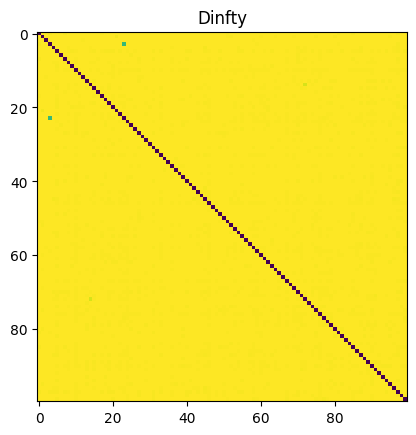

In [9]:
imshow(Dinfty)
_ = title('Dinfty')

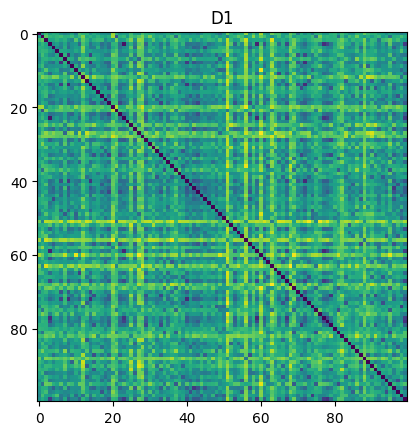

In [10]:
imshow(D1)
_ = title('D1')

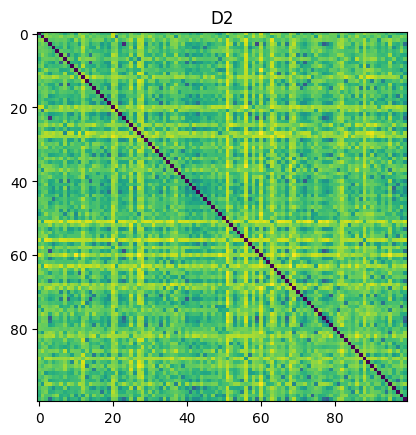

In [11]:
imshow(D2)
_ = title('D2')

In [12]:
%timeit dist_imgs(200,d_one) 

166 ms ± 58.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


  - The plot following is as demonstration to how it is avoided to calculate the first (100,100) combinations of images, which serves handy when in sequence a check has to be made between the performance of the two (or more).

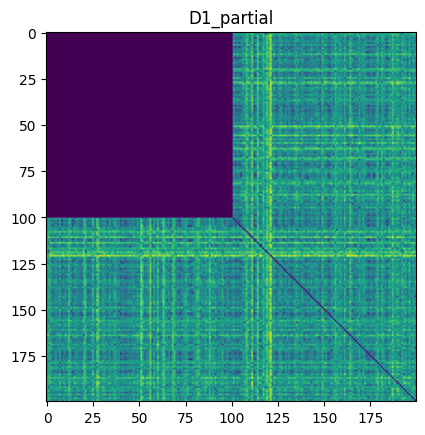

In [13]:
N=200
D = dist_imgs_rest(N,d_one,100)
  
imshow(D)
_ = title('D1_partial')

# Assignment 4

Using only a distance matrix, apply the algorithm described above and compute the efficency of the algorithm, i.e., write a function that:

Given a distance matrix with shape `(N,N)`, constructed on the first `N` samples of the `x_train` set, count the number of failures of the **leave one out** strategy, i.e., 

- set `error_counter` to zero
  
- for every line `i` of the matrix:

    - find the index `j` (different from `i`) for which `D[i,k] >= D[i,j]` for all `k` different from `i` and `j`.

    - if `y_train[j]` is different from `y_train[i]`, increment by one `error_counter`

- return the error: error_counter/N

- apply the function above to the 3 different distance matrices you computed before




# Solution

As a solution, a strategy called argsort appears, that avoids the nested loop which gets introduced by the leave one out strategy, instead for each row i, the distances are sorted and the second element is chosen as the minimum. Second element, because the minimum distance from i is always the ith image itself.

Observing the execution time, there is a notable difference in efficiency of the two approaches.

In [14]:
def argsort_count_errors(D):

  error_counter = 0
  N = len(D)

  for i in range(N):
    
    j = argsort(D[i])

    if y_train[j[1]] != y_train[i]:
      error_counter+=1

  return error_counter/N

In [15]:
def leave_one_out(D):

  error_counter = 0
  N = len(D)

  for i in range(N):

    j = 0 # current min is on 0th index

    l = range(N)[1:];
    exclude = {i} 
    new_range = (num for num in l if num not in exclude)
    for k in new_range:
      if D[i,j] >= D[i,k] and k!=i and k !=j:
        j = k

    if y_train[j] != y_train[i]:
      error_counter+=1

  return error_counter/N

In [16]:
def argsort_count_errors_faster(D, prev = []):

  error_counter = 0
  N = len(D)
  
  
  if prev == []:

    for i in range(N):

      # on the given row, sort the distances and take the second smallest one 
      # the type of sort used is quicksort by default
      # the smallest one corresponds to i itself
      j = argsort(D[i])

      if y_train[j[1]] != y_train[i]:
        error_counter+=1
      append(prev, D[i,j[1]])

  else:

    N_prev = len(prev)

    for i in range(N_prev):

      dists = append(D[i,range(N_prev, N)], prev[i])
      j = argsort(dists)

      if y_train[j[1]] != y_train[i]:
        error_counter+=1
      append(prev, D[i,j[1]])

    for i in range(N_prev,N):

      # on the given row, sort the distances and take the second smallest one 
      # the type of sort used is quicksort by default
      # the smallest one corresponds to i itself
      j = argsort(D[i])

      if y_train[j[1]] != y_train[i]:
        error_counter+=1
      append(prev, D[i,j[1]])

  return error_counter/N, prev

In [17]:
def leave_one_out_faster(D, prev = []):

  error_counter = 0
  N = len(D)

  if prev == []:

    for i in range(N):

      j = 0 # current min is on 0th index 
      l = range(N)[1:];
      exclude = {i}
      new_range = (num for num in l if num not in exclude)

      for k in new_range:
        if D[i,j] >= D[i,k] and k != i and k !=j:
          j = k

      if y_train[j] != y_train[i]:
        error_counter+=1
      append(prev, D[i,j])

  else:

      N_prev = len(prev)

      for i in range(N_prev):

        j = prev[i] # current min is from the submatrix from previous calculation
        l = range(N_prev, N);

        for k in l:

          if D[i,j] >= D[i,k] and k !=j:
            j = k

        if y_train[j] != y_train[i]:
          error_counter+=1
        append(prev, D[i,j])

      for i in range(N_prev, N):

        j = 0 # current min is on 0th index 
        l = range(N)[1:];
        exclude = {i}  
        new_range = (num for num in l if num not in exclude)

        for k in new_range:
          if D[i,j] >= D[i,k] and k != i and k !=j:
            j = k

        if y_train[j] != y_train[i]:
          error_counter+=1
        append(prev, D[i,j])

  return error_counter/N, prev

In [18]:
print('Error rate using the inf-normed distance matrix: ' + str(leave_one_out(Dinfty))) # D(100,100)
print('Error rate using the 1-normed distance matrix: ' + str(leave_one_out(D1))) # D(100,100)
print('Error rate using the 2-normed distance matrix: ' + str(leave_one_out(D2))) # D(100,100)

Error rate using the inf-normed distance matrix: 0.6
Error rate using the 1-normed distance matrix: 0.16
Error rate using the 2-normed distance matrix: 0.16


In [19]:
%timeit leave_one_out(D2)

5.92 ms ± 2.11 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [20]:
%timeit argsort_count_errors(D2)

635 µs ± 9.53 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


# Assignment 5

Run the algorithm implemented above for N=100,200,400,800,1600 on the three different distances, and plot the three error rate as a function of N (i.e., compute the distance matrix, and compute the efficiency associated to the distance matrix).

You should get an error like:
```
[[ 0.58      0.17      0.17    ]
 [ 0.52      0.145     0.135   ]
 [ 0.4425    0.15      0.135   ]
 [ 0.4       0.145     0.12875 ]
 [ 0.369375  0.1025    0.09375 ]]
```
where each column represents a different norm.

** In the next assignments, optional points are given if you manage to make the algorithm run faster, by pre-computing everything you can precompute in advance **



In [21]:
def dist_efficiency(arr_N, distimgs, count_errors):

  res = zeros((len(arr_N), 3))
  counter = 0

  for N in arr_N:

    Dinfty = distimgs(N,d_infty)
    D1 = distimgs(N,d_one)  
    D2 = distimgs(N,d_two)
    res[counter, :] = [count_errors(Dinfty), count_errors(D1), count_errors(D2)]
    counter += 1 

  return res

print('Error rate for different N-s using norms inf-norm, 1-norm, 2-norm in order - leave-one-out strategy: \n' + str(dist_efficiency([100, 200, 400, 800, 1600], dist_imgs, leave_one_out)))
print('\n')
print('Error rate for different N-s using norms inf-norm, 1-norm, 2-norm in order - argsort strategy: \n' + str(dist_efficiency([100, 200, 400, 800, 1600], dist_imgs, argsort_count_errors)))

Error rate for different N-s using norms inf-norm, 1-norm, 2-norm in order - leave-one-out strategy: 
[[0.6      0.16     0.16    ]
 [0.53     0.14     0.13    ]
 [0.4525   0.1475   0.1325  ]
 [0.3975   0.145    0.12875 ]
 [0.365625 0.1025   0.09375 ]]


Error rate for different N-s using norms inf-norm, 1-norm, 2-norm in order - argsort strategy: 
[[0.57    0.17    0.17   ]
 [0.52    0.145   0.135  ]
 [0.445   0.15    0.135  ]
 [0.4075  0.145   0.12875]
 [0.37375 0.1025  0.09375]]


In [22]:
def dist_efficiency_faster(arr_N, distimgs, count_errors):

  res = zeros((len(arr_N), 3))
  counter = 0
  prev_Dinfty = []
  prev_D1 = []
  prev_D2 = []

  for N in arr_N:

    len_prev_Dinfty = len(prev_Dinfty)
    len_prev_D1 = len(prev_D1)
    len_prev_D2 = len(prev_D2)

    Dinfty = distimgs(N,d_infty, len_prev_Dinfty)
    D1 = distimgs(N,d_one,len_prev_D1)  
    D2 = distimgs(N,d_two,len_prev_D2)

    [err_infty, prev_Dinfty] = count_errors(Dinfty, prev_Dinfty)
    [err_D1, prev_D1] = count_errors(D1, prev_D1)
    [err_D2, prev_D2] = count_errors(D2, prev_D2)

    res[counter, :] = [err_infty, err_D1, err_D2]

    counter += 1 

  return res

print('Error rate for different N-s using norms inf-norm, 1-norm, 2-norm in order - leave-one-out strategy - "faster" : \n' + str(dist_efficiency_faster([100, 200, 400, 800, 1600], dist_imgs_rest, leave_one_out_faster)))
print('\n')
print('Error rate for different N-s using norms inf-norm, 1-norm, 2-norm in order - argsort strategy - "faster" : \n' + str(dist_efficiency_faster([100, 200, 400, 800, 1600], dist_imgs_rest, argsort_count_errors_faster)))

Error rate for different N-s using norms inf-norm, 1-norm, 2-norm in order - leave-one-out strategy - "faster" : 
[[0.6      0.16     0.16    ]
 [0.53     0.14     0.13    ]
 [0.4525   0.1475   0.1325  ]
 [0.3975   0.145    0.12875 ]
 [0.365625 0.1025   0.09375 ]]


Error rate for different N-s using norms inf-norm, 1-norm, 2-norm in order - argsort strategy - "faster" : 
[[0.57    0.17    0.17   ]
 [0.52    0.145   0.135  ]
 [0.445   0.15    0.135  ]
 [0.4075  0.145   0.12875]
 [0.37375 0.1025  0.09375]]


  - Efficiency with argsort:
1min 10s ± 706 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

  - Efficiency with leave-one-out: 
1min 13s ± 751 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

  - Efficiency when using pre-computed distance matrix and pre-computed errors of previous, smaller, distance matrix reported below.

    - "Faster" efficiency with argsort:
    - "Faster" efficiency with leave-one-out:

The solution works if the N array is a monotonically increasing array.

In [23]:
%timeit dist_efficiency([100, 200, 400, 800, 1600], dist_imgs, argsort_count_errors)

59.3 s ± 1.3 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [24]:
%timeit dist_efficiency([100, 200, 400, 800, 1600], dist_imgs, leave_one_out)

1min 3s ± 747 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [25]:
%timeit dist_efficiency_faster([100, 200, 400, 800, 1600], dist_imgs_rest, argsort_count_errors_faster)

1min 58s ± 659 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [26]:
%timeit dist_efficiency_faster([100, 200, 400, 800, 1600], dist_imgs_rest, leave_one_out_faster)

2min 3s ± 2.02 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


# Assignment 6

In principle, it should be possible to decrease the error by using a better norm. From the table above, it is clear that the L2 distance works better than the L1 distance, which works better than the Linfty distance.

However, *none of these distances exploit the fact that the image is a two-dimensional object*, and that there is information also in the **neighboring** information of the pixels. 

One way to exploit this, is to interpret the image as a continuous function with values between zero and one, defined on a square domain `\Omega=[0,27]x[0,27]`.

$$ f: \Omega \to R $$

- Implement a function that computes an approximation of the $H^1$ norm distance on the renormalized images. Given two images $f_1$ and $f_2$
    - Compute $$a = \frac{f_1}{\int_\Omega f_1}$$, $$b=\frac{f_2}{\int_\Omega f_2}$$
    - Define the $H^1$ distance as
    $$
    d_{H^1}(f_1,f_2) := \sqrt{\int_\Omega |\nabla(a-b)|^2+ (a-b)^2}
    $$
    using the algorithm you prefer (or the library you prefer) to compute the gradients and the integrals. Notice that $\nabla f = (\partial f/\partial x, \partial f/\partial y)$ is a vector valued function, and $|\nabla g|^2 := (\partial g/\partial x)^2 + (\partial g/\partial y)^2$

- Compute the distance matrix and the efficiency for this distance for N=100,200,400,800,1600



In [27]:
def d_H1(f1, f2):

  a = f1/trapz(trapz(f1, axis=0))
  b = f2/trapz(trapz(f2, axis=0))

  g = gradient(a-b)
  u = power(g[0],2) + power(g[1],2)
  k = matrix_power((a-b),2)
  integ_row = trapz(u + k, axis=0)
  res = (sqrt(trapz(integ_row)))

  return res

def H1_efficiency(arr_N, dist_imgs, count_errors):

  res = zeros((len(arr_N),1))
  counter = 0

  for N in arr_N:
    H1 = dist_imgs(N,d_H1)
    res[counter,] = [count_errors(H1)]
    counter += 1    
  return res

print('Error rate for different N-s using the norm H1 - argsort strategy: \n' + str(H1_efficiency([100, 200, 400, 800, 1600], dist_imgs, argsort_count_errors)))

<ipython-input-27-ce7422803231>:10: RuntimeWarning: invalid value encountered in sqrt
  res = (sqrt(trapz(integ_row)))


Error rate for different N-s using the norm H1 - argsort strategy: 
[[0.82    ]
 [0.89    ]
 [0.875   ]
 [0.86125 ]
 [0.885625]]


<ipython-input-27-ce7422803231>:10: RuntimeWarning: invalid value encountered in sqrt
  res = (sqrt(trapz(integ_row)))


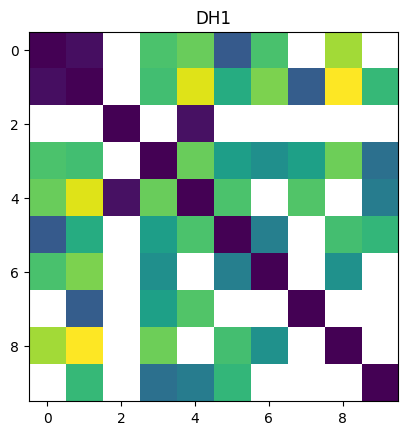

In [28]:
N = 10

DH1 = dist_imgs(N,d_H1)

imshow(DH1)
_ = title('DH1')

## Assigment 7

Use the `BallTree` algorithm (https://en.wikipedia.org/wiki/Ball_tree), from the `sklearn` package, and construct a tree data structure **that uses a distance from the steps defined above**.

For N in `[3200, 6400]` and for each distance defined above

- Build a tree using the first N entries of the training set `x_train`
- Construct a function that tests the efficiency on all the entries of the test set `x_test`:
    - for any image in `x_test`, call it `x_test[i]`, query the tree for the nearest neighbor (call it `k`), and assign as predicted digit the digit of the `x_train[k]` image, i.e., `y_train[k]`
    - check if `y_train[k]` is equal to the corresponding entry in `y_test[i]`. If not, increment a counter of the error
    - return the efficiency, i.e., `error_counter/len(x_test)`
- Plot, in a single graph, the error of each distance as a function of `N` (including labels, titles, etc.)

- Once you have the tree, experiment with different nearest neighbor algorithms, i.e., instead of taking only one nearest neighbor, take a larger number (a small number of your choice), and instead of returning the single closest digit, return the one with the largest number of occurrences. Plot the same graph you gave before, and see if you gain an improvement. Motivate all choices you have to make to get to the final answer.


In [29]:
from sklearn.neighbors import BallTree

In [30]:
def build_tree(N, dist):

  X = x_train[0:N].reshape(N,28*28) 
  tree = BallTree(X, leaf_size=40, metric = dist) 
  
  return tree

In [31]:
def count_errors_w_ball(tree, chosen_k):
  error_counter = 0

  for i in range(len(x_test)):
    
    dist, ind = tree.query(x_test[i].reshape(1,28*28), k=chosen_k)
    candidate_labels = list(y_train[ind])
    best_candidate_label = median(candidate_labels)

    if best_candidate_label != y_test[i]:
      error_counter+=1

  return error_counter/len(x_test)

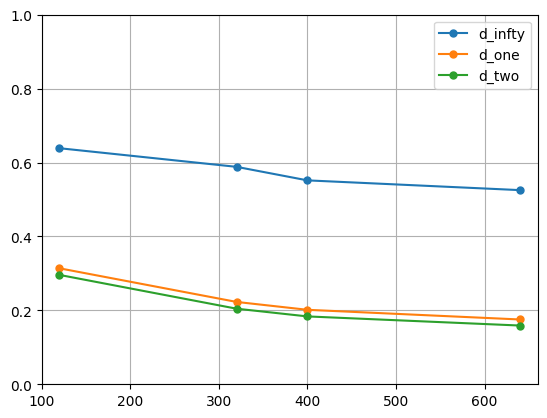

In [32]:
def plot_errors(dists, N, k):

  minN = min(N)
  maxN = max(N)
  axis([minN-20,maxN+20, 0, 1]) # axis limits

  for dist in dists:
    c = []
    for i in N:
        tree = build_tree(i, dist)
        c.append(count_errors_w_ball(tree, k))
    plot(N,c,marker="o", markersize=5, label=dist.__name__) 
    legend()

  grid()
  show()

dists = [d_infty, d_one, d_two] 
N = [120, 320, 400, 640]

plot_errors(dists,N, 1)